# Titanic Survival Predictions

This dataset contains the survival outcomes of the passengers onboard the Titanic, as well other information including features such as gender and class. <br>
Data from: https://www.kaggle.com/c/titanic/data

## Loading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performing EDA

### Chances of survival based on the sex of the passenger

In [5]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

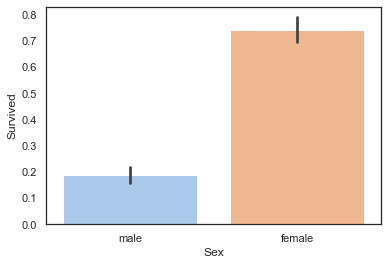

In [6]:
sns.set_theme(style='white', palette='pastel')
sns.barplot(x='Sex', y='Survived', data=train_df)

### Chances of survival based on the age of the passenger

In [7]:
age_groups = pd.cut(train_df['Age'], bins=[12, 19, 25, 40, 55, 70, np.inf]) # to create various age groups
age_df = train_df['Survived'].groupby(age_groups).mean()
age_df.head()

Age
(12.0, 19.0]    0.410526
(19.0, 25.0]    0.328467
(25.0, 40.0]    0.422053
(40.0, 55.0]    0.390909
(55.0, 70.0]    0.314286
Name: Survived, dtype: float64

### Chances of survival based on the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southhampton)

In [8]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean() # as_index = False to get output 'SQL-style'

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Chances of survival based on pclass (passenger class)

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


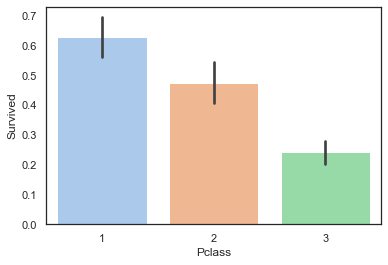

In [10]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)
plt.show()

### Chances of survival based on parents/children aboard 

In [11]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


### Chances of survival based on number of siblings/spouses aboard

In [12]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Cleaning the Data

### Checking for null values and replacing any with their mean (numerical values) or mode (categorical values)

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Check data types of each feature and ensure they're correct

In [14]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Find mean age and replace null values for age feature with mean age

In [15]:
mean_age = train_df.Age.mean()
print(mean_age)
train_df.Age.fillna(mean_age, inplace=True)

29.69911764705882


### Do the same for the test data set (so that the testing and training datasets are uniform)

In [16]:
mean_age = test_df.Age.mean()
print(mean_age)
test_df.Age.fillna(mean_age, inplace=True)

30.272590361445783


### Cast age to int type (for training and testing datasets)

In [17]:
train_df.Age.astype(int).dtypes
test_df.Age.astype(int).dtypes

dtype('int32')

### Find most common port of embarkation

In [18]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

### Replace all null values w 'S', since this is the mode

In [19]:
train_df.Embarked.fillna('S', inplace = True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Find mean fare price and replace null values for fare feature with mean fare price

In [20]:
mean_fare = train_df.Fare.mean()
print(mean_fare)
train_df.Fare.fillna(mean_fare, inplace=True)

32.204207968574636


### Do the same for the test data set (so that the testing and training datasets are uniform)

In [21]:
mean_fare = test_df.Fare.mean()
print(mean_fare)
test_df.Fare.fillna(mean_fare, inplace=True)

35.627188489208635


## Adding Columns

### Add a column to categorize the ages of the passengers

In [22]:
train_df.loc[train_df['Age'] <= 12, 'AgeCategory'] = 0
train_df.loc[(train_df['Age'] > 12) & (train_df['Age'] <= 19), 'AgeCategory'] = 1
train_df.loc[(train_df['Age'] > 19) & (train_df['Age'] <= 25), 'AgeCategory'] = 2
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 40), 'AgeCategory'] = 3
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 55), 'AgeCategory'] = 4
train_df.loc[(train_df['Age'] > 55) & (train_df['Age'] <= 75), 'AgeCategory'] = 5
train_df.loc[train_df['Age'] > 75, 'AgeCategory'] = 6
train_df['AgeCategory'] = train_df['AgeCategory'].astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


### Now do the same for the test data file

In [23]:
test_df.loc[test_df['Age'] <= 12, 'AgeCategory'] = 0
test_df.loc[(test_df['Age'] > 12) & (test_df['Age'] <= 19), 'AgeCategory'] = 1
test_df.loc[(test_df['Age'] > 19) & (test_df['Age'] <= 25), 'AgeCategory'] = 2
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 40), 'AgeCategory'] = 3
test_df.loc[(test_df['Age'] > 40) & (test_df['Age'] <= 55), 'AgeCategory'] = 4
test_df.loc[(test_df['Age'] > 55) & (test_df['Age'] <= 75), 'AgeCategory'] = 5
test_df.loc[test_df['Age'] > 75, 'AgeCategory'] = 6
test_df['AgeCategory'] = test_df['AgeCategory'].astype(int)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


### And now will remove the age column from both the test and training dataframes, as it is no longer necessary

In [24]:
train_df = train_df.drop('Age', 1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,3


In [25]:
test_df = test_df.drop('Age', 1)
test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,5
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,2


### Add a column to categorize the fares of the passengers

In [26]:
# First will determine min and max fares of training and test data
print("Training Max Fare: ", train_df["Fare"].max())
print("Training Min Fare: ", train_df["Fare"].min())

print("Testing Max Fare: ", test_df["Fare"].max())
print("Testing Min Fare: ", test_df["Fare"].min())

Training Max Fare:  512.3292
Training Min Fare:  0.0
Testing Max Fare:  512.3292
Testing Min Fare:  0.0


### First add the column to the training data

In [27]:
train_df.loc[train_df['Fare'] <= 10, 'FareCategory'] = 0
train_df.loc[(train_df['Fare'] > 10) & (train_df['Fare'] <= 25), 'FareCategory'] = 1
train_df.loc[(train_df['Fare'] > 25) & (train_df['Fare'] <= 35), 'FareCategory'] = 2
train_df.loc[(train_df['Fare'] > 35) & (train_df['Fare'] <= 45), 'FareCategory'] = 3
train_df.loc[(train_df['Fare'] > 45) & (train_df['Fare'] <= 65), 'FareCategory'] = 4
train_df.loc[(train_df['Fare'] > 65) & (train_df['Fare'] <= 85), 'FareCategory'] = 5
train_df.loc[(train_df['Fare'] > 85) & (train_df['Fare'] <= 135), 'FareCategory'] = 6
train_df.loc[(train_df['Fare'] > 135) & (train_df['Fare'] <= 250), 'FareCategory'] = 7
train_df.loc[(train_df['Fare'] > 250) & (train_df['Fare'] <= 435), 'FareCategory'] = 8
train_df.loc[train_df['Fare'] > 435, 'FareCategory'] = 9
train_df['FareCategory'] = train_df['FareCategory'].astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,3,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,3,0


### Now do the same for the test data file

In [28]:
test_df.loc[test_df['Fare'] <= 10, 'FareCategory'] = 0
test_df.loc[(test_df['Fare'] > 10) & (test_df['Fare'] <= 25), 'FareCategory'] = 1
test_df.loc[(test_df['Fare'] > 25) & (test_df['Fare'] <= 35), 'FareCategory'] = 2
test_df.loc[(test_df['Fare'] > 35) & (test_df['Fare'] <= 45), 'FareCategory'] = 3
test_df.loc[(test_df['Fare'] > 45) & (test_df['Fare'] <= 65), 'FareCategory'] = 4
test_df.loc[(test_df['Fare'] > 65) & (test_df['Fare'] <= 85), 'FareCategory'] = 5
test_df.loc[(test_df['Fare'] > 85) & (test_df['Fare'] <= 135), 'FareCategory'] = 6
test_df.loc[(test_df['Fare'] > 135) & (test_df['Fare'] <= 250), 'FareCategory'] = 7
test_df.loc[(test_df['Fare'] > 250) & (test_df['Fare'] <= 435), 'FareCategory'] = 8
test_df.loc[test_df['Fare'] > 435, 'FareCategory'] = 9
test_df['FareCategory'] = test_df['FareCategory'].astype(int)
test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FareCategory
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,4,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,5,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,2,1


### And now will remove the fare column from both the test and training dataframes, as it is no longer necessary

In [29]:
train_df = train_df.drop('Fare', 1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C,3,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,S,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S,3,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,S,3,0


In [30]:
test_df = test_df.drop('Fare', 1)
test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,AgeCategory,FareCategory
0,892,3,"Kelly, Mr. James",male,0,0,330911,NaN,Q,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,NaN,S,4,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,NaN,Q,5,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,NaN,S,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,NaN,S,2,1


### Will also remove the Cabin and Ticket Cols as they are no longer necessary

In [31]:
train_df = train_df.drop('Cabin', 1)
train_df = train_df.drop('Ticket', 1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,3,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,S,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,3,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,S,3,0


In [32]:
test_df = test_df.drop('Cabin', 1)
test_df = test_df.drop('Ticket', 1)
test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Embarked,AgeCategory,FareCategory
0,892,3,"Kelly, Mr. James",male,0,0,Q,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,S,4,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,Q,5,0
3,895,3,"Wirz, Mr. Albert",male,0,0,S,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,S,2,1


### Now will map the embarked column to numeric values as well

In [33]:
train_df['EmbarkedCategory'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,AgeCategory,FareCategory,EmbarkedCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,S,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,3,5,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,S,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,3,4,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,S,3,0,0


In [34]:
test_df['EmbarkedCategory'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Embarked,AgeCategory,FareCategory,EmbarkedCategory
0,892,3,"Kelly, Mr. James",male,0,0,Q,3,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,S,4,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,Q,5,0,2
3,895,3,"Wirz, Mr. Albert",male,0,0,S,3,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,S,2,1,0


### And now will remove the embarked column from both the test and training dataframes, as it is no longer necessary

In [35]:
train_df = train_df.drop('Embarked', 1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,AgeCategory,FareCategory,EmbarkedCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,3,5,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,3,4,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,3,0,0


In [36]:
test_df = test_df.drop('Embarked', 1)
test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,AgeCategory,FareCategory,EmbarkedCategory
0,892,3,"Kelly, Mr. James",male,0,0,3,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,4,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,5,0,2
3,895,3,"Wirz, Mr. Albert",male,0,0,3,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,2,1,0


### Now will add a col to indicate the passengers' social status/title

In [37]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.') # using regular expressions to extract title
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,AgeCategory,FareCategory,EmbarkedCategory,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,2,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,3,5,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,3,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,3,4,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0,0,3,0,0,Mr


In [38]:
# Find out how many people of each title survived, to see which titles are important to keep for training the classifier
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [39]:
# Observe that Sir, Countess, Lady, Miss, Mrs, Ms, Mr, Mlle, Mme, and Master are important titles
# Will indicate all other titles to be 'Other'
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Master', 'Rev'], 'Other')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,AgeCategory,FareCategory,EmbarkedCategory,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,2,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,3,5,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,3,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,3,4,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0,0,3,0,0,Mr


In [40]:
# Now combine Miss, Ms, Mlle into the title of Ms and combine Mme, Lady, Mrs, Countess into the title of Mrs

train_df['Title'] = train_df['Title'].replace('Mlle', 'Ms')
train_df['Title'] = train_df['Title'].replace('Miss', 'Ms')

train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].replace('Countess', 'Mrs')
train_df['Title'] = train_df['Title'].replace('Lady', 'Mrs')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,AgeCategory,FareCategory,EmbarkedCategory,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,2,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,3,5,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,3,0,0,Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,3,4,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0,0,3,0,0,Mr


In [41]:
# Now do the same for the test dataframe

test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.')
test_df['Title'] = test_df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Master', 'Rev'], 'Other')

test_df['Title'] = test_df['Title'].replace('Mlle', 'Ms')
test_df['Title'] = test_df['Title'].replace('Miss', 'Ms')

test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
test_df['Title'] = test_df['Title'].replace('Countess', 'Mrs')
test_df['Title'] = test_df['Title'].replace('Lady', 'Mrs')

test_df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,AgeCategory,FareCategory,EmbarkedCategory,Title
0,892,3,"Kelly, Mr. James",male,0,0,3,0,2,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,4,0,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,5,0,2,Mr
3,895,3,"Wirz, Mr. Albert",male,0,0,3,0,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,2,1,0,Mrs


### Now remove name col from both test and training dataframes

In [42]:
train_df = train_df.drop('Name', 1)
test_df = test_df.drop('Name', 1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,AgeCategory,FareCategory,EmbarkedCategory,Title
0,1,0,3,male,1,0,2,0,0,Mr
1,2,1,1,female,1,0,3,5,1,Mrs
2,3,1,3,female,0,0,3,0,0,Ms
3,4,1,1,female,1,0,3,4,0,Mrs
4,5,0,3,male,0,0,3,0,0,Mr


## Using the Decision Tree Classifier

In [43]:
y_train = train_df['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'AgeCategory', 'FareCategory', 'EmbarkedCategory', 'Title']
x_train = pd.get_dummies(train_df[features])
x_test = pd.get_dummies(test_df[features])

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.predict(x_test)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [45]:
# Mean Accuracy
model_score = round(model.score(x_train, train_df['Survived']) * 100, 2)
print(model_score)

89.56


## Using the Random Forest Classifier 

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.predict(x_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [49]:
# Mean Accuracy
model_score = round(model.score(x_train, train_df['Survived']) * 100, 2)
print(model_score)

89.56
